In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize # We cheat by loading a built in line search method
from scipy.optimize import line_search
from math import sqrt

In [2]:
#The graident of f is 1/2*A^T*x+1/2*A*x+b  
#https://math.stackexchange.com/questions/222894/how-to-take-the-gradient-of-the-quadratic-form

#Solve Optimization Problems in Python Using SciPy minimize() Function
#https://www.youtube.com/watch?v=Vo4icWEoZfg

In [3]:

def myplot(f,pointlist, showmin=False, m=[0,0]):
    """Plots the points in pointlist on a countour plot of f:
    f (function) - target function
    pointlist (array) - list of points provided by some iterative algorithm
    showmin (bool) - whether or not to show the actual minimum
    m - the location of the actual minimum
    """
    # Setup plot
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_aspect(1)
    # Plot points
    xvals = [p[0] for p in pointlist]
    yvals = [p[1] for p in pointlist]
    plt.plot(xvals,yvals,'ro-', linewidth=1.0)

    if showmin:
        plt.plot(m[0],m[1],'kx')
         # Add countour plot
    delta = 0.025
    x = np.arange(min(xvals + [m[0]])-.2, max(xvals + [m[0]])+.2, delta)
    y = np.arange(min(yvals + [m[1]])-.2, max(yvals + [m[1]])+.2, delta)
    X, Y = np.meshgrid(x, y)
    Z = f([X,Y])
    plt.contour(X,Y,Z,30);

In [7]:

def steepest(f, g, A, init):
    """Steepest descent method:
    f  - target function
    g  - gradient of f
    init  - initial point (as list of coordinates)
    iterations  - how many steps to carry out
    """
    xlist = [init]; # list of points, consisting of just the initial point for now
    k = 0; #iterations
    accuracy = np.linalg.norm(g(init));
    while accuracy >= 1e-06:
        # get the final point in xlist:
        x = xlist[-1]
        # exact line search method
        # line search in direction of g(x):
        numerator = accuracy**2;
        denominator = np.dot(np.dot(np.transpose(g(x)),A),g(x))[0][0];
        alpha = numerator/denominator;
        
        # add new point to xlist:
        xlist += [x - alpha*g(x)];
        accuracy = np.linalg.norm(g(xlist[-1]));
        k += 1;
        
    return xlist, k 

In [8]:
f = lambda x: .5*x[0]**2-x[0]*x[2]+3*x[0]*x[3]+x[1]**2+x[1]*x[2]+3*x[2]**2-x[2]*x[3]+5*x[3]**2+2*x[0]+18*x[1]-19*x[2]-5*x[3];
#The graident of f is 1/2*A^T*x+1/2*A*x+b = A*x+b since A^T = A;
#A.transpose()==A
g = lambda x: np.array([x[0]-x[2]+3*x[3]+2, 2*x[1]+x[2]+18, -1*x[0]+x[1]+6*x[2]-x[3]-19, 3*x[0]-x[2]+10*x[3]-5]);
A = np.array([[1,0,-1,3],[0,2,1,0],[-1,1,6,-1],[3,0,-1,10]]);
init = np.array([[0], [0], [0], [0]]);
# Calculate points of iteration and the total number of iterations
pointlist_steep, iterations_steep = steepest(f,g,A,init)
pointlist_steep[-1]

array([[ 20.99991612],
       [-12.99999453],
       [  7.99998909],
       [ -4.99997584]])

In [9]:
def newton_quasi(f, g, C, A, init):
    xlist = [init];
    k = 0;
    accuracy = np.linalg.norm(g(init));
    while accuracy >= 1e-06:
        x = xlist[-1];
        d = np.dot(C*(-1), g(x));
        # exact line search method
        numerator = np.linalg.norm(g(x))**2;
        denominator = np.dot(np.dot(np.transpose(g(x)),A),g(x))[0][0];
        alpha = numerator/denominator;
        
        # add new point to xlist:
        xlist += [x + alpha*d];
        deltax = alpha*d;
        deltax_trans = np.transpose(deltax);
        deltag = g(xlist[-1]) - g(xlist[-2]);
        deltag_trans = np.transpose(deltag);
        #updated metric C(k+1), satisfying C(k+1)∆g(k) = ∆x(k)
        numerator1 = np.dot(deltax, deltax_trans); denominator1 = np.dot(deltax_trans, deltag)[0][0];
        numerator2 = np.dot(np.dot(np.dot(C, deltag),deltag_trans),C); denominator2 = np.dot(np.dot(deltag_trans, C),deltag)[0][0];
        C = C + numerator1/denominator1 - numerator2/denominator2;
        k+=1
        accuracy = np.linalg.norm(g(xlist[-1]));
    return xlist, k
                

In [10]:
f = lambda x: .5*x[0]**2-x[0]*x[2]+3*x[0]*x[3]+x[1]**2+x[1]*x[2]+3*x[2]**2-x[2]*x[3]+5*x[3]**2+2*x[0]+18*x[1]-19*x[2]-5*x[3];
#The graident of f is 1/2*A^T*x+1/2*A*x+b = A*x+b since A^T = A;
#A.transpose()==A
#https://math.stackexchange.com/questions/222894/how-to-take-the-gradient-of-the-quadratic-form
g = lambda x: np.array([x[0]-x[2]+3*x[3]+2, 2*x[1]+x[2]+18, -1*x[0]+x[1]+6*x[2]-x[3]-19, 3*x[0]-x[2]+10*x[3]-5]);
A = np.array([[1,0,-1,3],[0,2,1,0],[-1,1,6,-1],[3,0,-1,10]]);
b = np.array([[2],[18],[-19],[-5]]);
C = np.identity(4);
init = np.array([[0], [0], [0], [0]]);
pointlist, iterations = newton_quasi(f,g,C,A,init)
#myplot(f,pointlist, showmin=True, m=np.dot(-1*np.linalg.inv(A),b))
pointlist[-1]

array([[ 21.00010646],
       [-13.00000688],
       [  8.00001383],
       [ -5.00003058]])

In [11]:
# stationary point calculated by formula
np.dot(-1*np.linalg.inv(A),b)

array([[ 21.],
       [-13.],
       [  8.],
       [ -5.]])

In [12]:
def newton_quasi_ILS(f,g,C,init):
    xlist = [init];
    k = 0;
    accuracy = np.linalg.norm(g(init));
    
    while accuracy >= 1e-04:
        x = xlist[-1];
        d = np.dot(C*(-1), g(x));
        def GS(f, x, d):
            low = 0;
            upper = 5;
            p = (3-sqrt(5))/2;
            f0 = lambda a: f(x + a*d);
            interval = upper-low;first_mid = low+p*interval;second_mid = low+(1-p)*interval;
            while interval > .05: #tolerance
                if f0(first_mid)<f0(second_mid):
                    upper = second_mid;
                    second_mid = first_mid;
                    interval = upper-low;
                    first_mid = low+p*interval;
                else:
                    low = first_mid;
                    first_mid = second_mid;
                    interval = upper-low;
                    second_mid = low+(1-p)*interval
            alpha = (upper+low)/2;
            return alpha
        
        def line_search(f, grad_f, x, d, alpha=1.0, rho=0.5, c=1e-4, max_iter=100):
            
            """
            Implements an iterative line search to find the step size alpha
            that minimizes the function f(x + alpha * d).

            f: the objective function
            grad_f: the gradient of the objective function
            x: the starting point
            d: the search direction
            alpha: the initial step size
            rho: the factor by which alpha is multiplied in each iteration
            c: the parameter used to check the Armijo-Goldstein condition
            max_iter: the maximum number of iterations

            Returns the step size alpha.
            """
   
            fx = f(x)
            grad_fx = grad_f(x)

            for i in range(max_iter):
            # Compute the function value and gradient at x + alpha * d
                x_new = x + alpha * d
                fx_new = f(x_new)
                grad_fx_new = grad_f(x_new)

                # Check the Armijo-Goldstein condition
                if fx_new <= fx + c * alpha * np.dot(np.transpose(d),grad_fx):
                    return alpha

                    # If the condition is not satisfied, reduce alpha
                alpha *= rho

            return alpha
  
        alpha = line_search(f, g, x, d)
        #alpha = GS(f, x, d)
        
        #ftilde = lambda a: f(x + a*d);
        #alpha = minimize(ftilde, [0]).x[0];    
        #alpha = GS(f, g, x, d)
        #alpha = t;
        
        
        # add new point to xlist:
        xlist += [x + alpha*d];
        deltax = alpha*d;
        deltax_trans = np.transpose(deltax);
        deltag = g(xlist[-1]) - g(xlist[-2]);
        deltag_trans = np.transpose(deltag);
        #updated metric C(k+1), satisfying DFP
        numerator1 = np.dot(deltax, deltax_trans); denominator1 = np.dot(deltax_trans, deltag)[0][0];
        numerator2 = np.dot(np.dot(np.dot(C, deltag),deltag_trans),C); denominator2 = np.dot(np.dot(deltag_trans, C),deltag)[0][0];
        
        C = C + numerator1/denominator1 - numerator2/denominator2;
        k+=1
        accuracy = np.linalg.norm(g(xlist[-1]));
    return xlist, k
                

In [13]:
f_Rosenbrock = lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2;
g_Rosenbrock = lambda x: np.array([-400*(x[1]*x[0]-x[0]**3)-2*(1-x[0]), 200*(x[1]-x[0]**2)]);
init_Rosenbrock = np.array([[-1],[2]]);
C2 = np.identity(2);
final,itera = newton_quasi_ILS(f_Rosenbrock,g_Rosenbrock,C2,init_Rosenbrock)

In [14]:
final[-1]

array([[0.99999994],
       [0.99999984]])

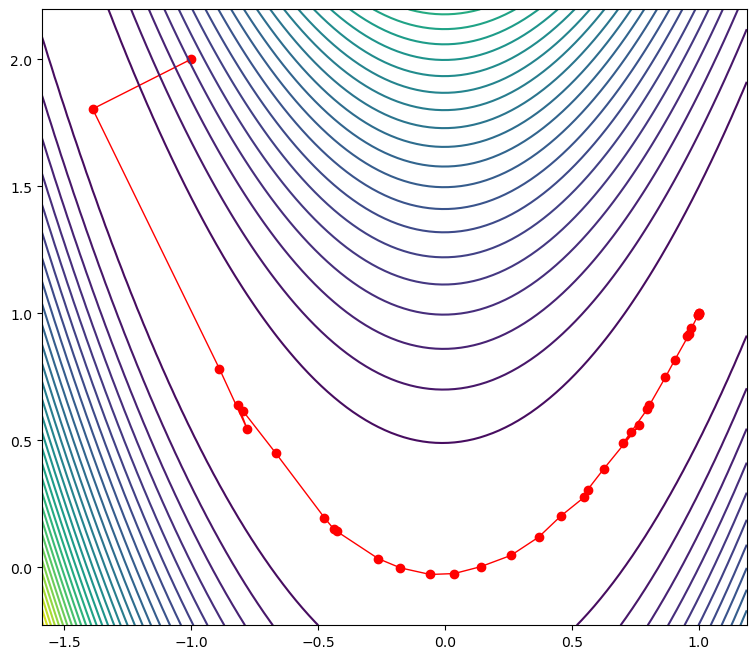

In [15]:
myplot(f_Rosenbrock,final, showmin=False, m=[1,1])

In [13]:
itera

35

In [14]:
iterations

687

In [15]:
iterations_steep

8260

In [105]:
def newton_quasi(f,g,C,init):
    xlist = [init];
    k = 0;
    accuracy = np.linalg.norm(g(init));
    while accuracy >= 1e-06:
        x = xlist[-1];
        d = np.dot(C*(-1), g(x));
        ftilde = lambda a: f(x + a*d);
        alpha = minimize(ftilde, [0]).x[0];
        # add new point to xlist:
        xlist += [x + alpha*d];
        deltax = alpha*d;
        deltax_trans = np.transpose(deltax);
        deltag = g(xlist[-1]) - g(xlist[-2]);
        deltag_trans = np.transpose(deltag);
        #updated metric C(k+1), satisfying C(k+1)∆g(k) = ∆x(k)
        numerator1 = np.dot(deltax, deltax_trans); denominator1 = np.dot(deltax_trans, deltag)[0][0];
        numerator2 = np.dot(np.dot(np.dot(C, deltag),deltag_trans),C); denominator2 = np.dot(np.dot(deltag_trans, C),deltag)[0][0];
        C = C + numerator1/denominator1 - numerator2/denominator2;
        k+=1
        accuracy = np.linalg.norm(g(xlist[-1]));
    return xlist, k
                

In [14]:
def newton_quasi_ILS(f,g,C,init):
    xlist = [init];
    k = 0;
    accuracy = np.linalg.norm(g(init));
    
    while accuracy >= 1e-04:
        x = xlist[-1];
        d = np.dot(C*(-1), g(x));
        
        def backtrack(x0, f, dff, t, alpha, beta, count):
            while (f(x0) - f(x0 - t*dff(x0)) + alpha * t * np.dot(dff(x0), dff(x0)))< 0:
                t *= beta
                count += 1
            return t, count

        #t,count = backtrack(init, f, g, 1, 0.3, 0.8, 1)
        
        
        def Backtracking(f, g, x, d):
            alpha = 1;
            p = 0.8;
            c = 0.3;
            while f(x+alpha*d) > f(x) + c*alpha*np.dot(g(x),d):
                alpha = p*alpha;
            return alpha
        
        def GS(f, g, x, d):
            alpha = 1;
            p = (3-sqrt(5))/2;
            f0 = lambda a: f(x + a*d);
            f1 = np.dot(np.transpose(g(x)),d);
            while (2*alpha*p-alpha)*f1 > .05:
                alpha = alpha*p;
            return alpha
                    
        alpha = Backtracking(f, g, x, d)
        print(alpha)
        #ftilde = lambda a: f(x + a*d);
        #alpha = minimize(ftilde, [0]).x[0];    
        #alpha = GS(f, g, x, d)
        #alpha = t;
        
        
        # add new point to xlist:
        xlist += [x + alpha*d];
        deltax = alpha*d;
        deltag = g(xlist[-1]) - g(xlist[-2]);
        deltag_trans = np.transpose(deltag);
        #updated metric C(k+1), satisfying C(k+1)∆g(k) = ∆x(k)
        part1 = deltax - np.dot(C, deltag); 
        part1_trans = np.transpose(part1);
        numerator = np.dot(part1, part1_trans);
        denominator = np.dot(deltag_trans, part1);
        C = C + numerator/denominator;
        k+=1
        accuracy = np.linalg.norm(g(xlist[-1]));
        print(xlist[-1])
    return xlist, k
                

In [14]:
def myplot(f,pointlist, showmin=False, m=[0,0]):
    """Plots the points in pointlist on a countour plot of f:
    f (function) - target function
    pointlist (array) - list of points provided by some iterative algorithm
    showmin (bool) - whether or not to show the actual minimum
    m - the location of the actual minimum
    """
    # Setup plot
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_aspect(1)
    # Plot points
    xvals = [p[0] for p in pointlist]
    yvals = [p[1] for p in pointlist]
    plt.plot(xvals,yvals,'ro-', linewidth=1.0)

    if showmin:
        plt.plot(m[0],m[1],'kx')
         # Add countour plot
    delta = 0.025
    x = np.arange(min(xvals + [m[0]])-.2, max(xvals + [m[0]])+.2, delta)
    y = np.arange(min(yvals + [m[1]])-.2, max(yvals + [m[1]])+.2, delta)
    X, Y = np.meshgrid(x, y)
    Z = f([X,Y])
    plt.contour(X,Y,Z,30);
    
def steepest(f,g,init,iterations=3, verbose=False):
    """Steepest descent method:
    f  - target function
    g  - gradient of f
    init  - initial point (as list of coordinates)
    iterations  - how many steps to carry out
    """
    xlist = [init] # list of points, consisting of just the initial point for now
    for i in range(iterations):
    # get the final point in xlist:
        x = xlist[-1]
        # line search in direction of g(x):
        ftilde = lambda a: f(x - a*g(x))
        alpha = minimize(ftilde, [0]).x[0]
        # add new point to xlist:
        xlist += [x - alpha*g(x)]
        # print data if requested:
        if verbose:
            print("x" + str(i) + " = " + str(x))
            print("f" + str(i) + " = " + str(f(x)))
            print("gradient" + str(i) + " = " + str(g(x)))
            print("alpha = " + str(alpha))
            print("")
            # print final point if requested:
    if verbose:
        print("x" + str(i+1) + " = " + str(xlist[-1]))
        # output the list of all iterates:
    return xlist

def newton(f,g,H,init,iterations=3, verbose=False):
    """Newton's method:
    f (function) - target function
    g (function) - gradient of f
    H - Hessian of f
    init (arrray) - initial point (as list of coordinates)
    iterations (int) - how many steps to carry out
    verbose (bool) - whether or not to print data for every step
    """
    xlist = [init]
    for i in range(iterations):
        x = xlist[-1]
        xlist += [x - np.linalg.inv(H(x)).dot(g(x)).A1]
        print(xlist)
    return xlist

In [41]:
def newton(f,g,H,init,iterations=3, verbose=False):
    """Newton's method:
 f (function) - target function
 g (function) - gradient of f
 H - Hessian of f
 init (arrray) - initial point (as list of coordinates)
 iterations (int) - how many steps to carry out
 verbose (bool) - whether or not to print data for every step
 """
    xlist = [init]
    for i in range(iterations):
        x = xlist[-1]
        if verbose:
            
            print("x" + str(i) + "=\n" + str(x))
            print("f" + str(i) + "=" + str(f(x)))
            print("gradient" + str(i) + "=\n" + str(g(x)))
            print("Hessian" + str(i) + "=")
            print(H(x))
            print("")
        xlist += [x - np.linalg.inv(H(x)).dot(g(x)).A1]
    if verbose:
        
        print("x" + str(i+1) + "=\n" + str(xlist[-1]))
    return xlist

In [42]:
f = lambda x: x[0] + x[0]**2 - x[0]**3 + x[1]**2
g = lambda x: np.array([1 + 2*x[0] - 3*x[0]**2, 2*x[1]])
H = lambda x: np.matrix([[2 - 6*x[0],0],[0,2]])
init = np.array([.5,1])
pointlist = newton(f,g,H,init)
#myplot(f,pointlist, showmin=True, m=[-1./3,0])

In [28]:
X = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]

Y = [[5,8,1],
    [6,7,3],
    [4,5,9]]
(np.array(X)+np.array(Y))

array([[17, 15,  4],
       [10, 12,  9],
       [11, 13, 18]])

In [5]:
alpha = 0.3
beta = 0.8

f = lambda x: (x[0]**2 + 3*x[1]*x[0] + 12)
dff = lambda x: np.array([2*x[0] + 3*x[1], 3*x[0]])


t = 1
count = 1
x0 = np.array([2,3])
dx0 = np.array([.1, 0.05])


def backtrack(x0, dff, t, alpha, beta, count):
    while (f(x0) - f(x0 - t*dff(x0)) + alpha * t * np.dot(dff(x0), dff(x0)))< 0:
        t *= beta
        count += 1
    return t, count

t,count = backtrack(x0, dff, t, alpha, beta,count)
count

3

In [2]:
np.dot(np.array([1,2]), np.array([1,2]))

5